# 퍼셉트론 ~ 신경망 학습까지의 실습

In [28]:
!conda install ipywidgets matplotlib scikit-learn -y
  from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


PackagesNotFoundError: The following packages are not available from current channels:

  - matplotlib,
  - ipywidgets,

Current channels:

  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sclab01\Anaconda3\envs\tensorflow2.0

  added / updated specs:
    - ipywidgets
    - matplotlib
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-1.3.0              |   py39haa95532_0         171 KB
    ca-certificates-2022.10.11 |       haa95532_0         125 KB
    ------------------------------------------------------------
                                           Total:         296 KB

The following NEW packages will be INSTALLED:

  absl-py            pkgs/main/win-64::absl-py-1.3.0-py39haa95532_0
  gast               pkgs/main/noarch::gast-0.5.3-pyhd3eb1b0_0
  keras


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::tensorflow==2.9.1=mkl_py39hb9887a6_0


==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda




## OR 퍼셉트론

In [2]:
# OR 퍼셉트론
# w: 가중치, x: 데이터 (입력)
# 가중치 합이 0보다 같거나 작으면 0 출력
# 가중치 합이 양수이면 1 출력 

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5,0.5])
    b = -0.4
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else :
        return 1

import numpy as np
print("OR(0,0):", OR(0,0))
print("OR(0,1):",OR(0,1))
print("OR(1,0):",OR(1,0))
print("OR(1,1):",OR(1,1))

OR(0,0): 0
OR(0,1): 1
OR(1,0): 1
OR(1,1): 1


# AND 퍼셉트론

In [3]:
# AND 퍼셉트론
# w: 가중치, x: 데이터 (입력)

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5,0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else :
        return 1

import numpy as np
print("AND(0,0):", AND(0,0))
print("AND(0,1):",AND(0,1))
print("AND(1,0):",AND(1,0))
print("AND(1,1):",AND(1,1))


AND(0,0): 0
AND(0,1): 0
AND(1,0): 0
AND(1,1): 1


In [32]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(w1, w2, b):
    global cnt
    plt.figure(figsize=[3, 3])
    x = np.linspace(-10, 10, num=1000)
    
    #직선 그리기
    if w1 == 0 and w2 == 0:
      pass
    elif w2 == 0:
      plt.plot([-b/w1, -b/w1], [-100, 100], c="b")
    else:
      m = w1/w2
      plt.plot(x, -m * x -b/w2, c="b")
    
    #데이터 점들 그림 그리기
    x1 = np.array([0, 0, 1, 1])
    x2 = np.array([0, 1, 0, 1])
    label = w1 * x1 + w2 * x2 + b > 0
    
    plt.scatter(x1[label], x2[label], c="r", marker="o", label="True")
    plt.scatter(x1[~label], x2[~label], c="b", marker="x", label="Fales")
    plt.grid("on")
    plt.legend(loc=4)
    
    plt.ylim(-1.5, 2.5)
    plt.xlim(-1.5, 2.5)
    plt.xticks([-1, 0, 1, 2])
    plt.yticks([-1, 0, 1, 2])
    plt.show()
    print("x1 | x2 | y ")
    for i in range(4):
      print(" %d |  %d | %d" % (x1[i], x2[i], label[i]))
    cnt += 1

interactive_plot = interactive(f, w1=widgets.FloatSlider( value= 0.2,
           min=-1.0, max=1.0, step=0.05, continuous_update=True),
                               w2=widgets.FloatSlider( value = 0.2,
           min=-1.0, max=1.0, step=0.05, continuous_update=True),
                               b=widgets.FloatSlider( value = -0.1,
           min=-1.5, max=1.5, step=0.05, continuous_update=True),)

print("단층 퍼셉트론 파라미터 조정")
print("질문: 단층 퍼셉트론 XOR이 가능한가?")
display(interactive_plot)

단층 퍼셉트론 파라미터 조정
질문: 단층 퍼셉트론 XOR이 가능한가?


interactive(children=(FloatSlider(value=0.2, description='w1', max=1.0, min=-1.0, step=0.05), FloatSlider(valu…

# 다층 퍼셉트론 실습 (XOR)

In [5]:
#XOR을 위한 다층 퍼셉트론
import numpy as np
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5,0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else :
        return 1

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5,-0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else :
        return 1
    
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5,0.5])
    b = -0.4
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else :
        return 1

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    return AND(s1, s2)
        

print("XOR(0,0) = ", XOR(0,0))
print("XOR(0,1) = ",XOR(0,1))
print("XOR(1,0) = ",XOR(1,0))
print("XOR(1,1) = ",XOR(1,1))


XOR(0,0) =  0
XOR(0,1) =  1
XOR(1,0) =  1
XOR(1,1) =  0


In [38]:
#퍼셉트론의 heatmap 그리기
def draw_heatmap(predictor):
  plt.figure(figsize=[5, 5])

  ngrid = 151
  xyrange = np.linspace(-1.5, 2.5, ngrid)

  xx, yy = np.meshgrid(xyrange, xyrange)

  heat_test_x = np.stack([xx, yy], axis=-1).reshape([-1, 2])
  #print(heat_test_x)

  lambda_fn = lambda x: predictor(x[0], x[1])

  pred_heat = np.apply_along_axis(lambda_fn, 1, heat_test_x)

  pred_heat = pred_heat.reshape([ngrid, ngrid])

  plt.pcolor(xyrange, xyrange, pred_heat, cmap="coolwarm", alpha=0.5)
  plt.xlim(-1.5, 2.5)
  plt.ylim(-1.5, 2.5)

  # 4개의점 (0, 0), (0, 1), (1, 0), (0, 0)
  plt.scatter([0, 0, 1, 1], [0, 1, 0, 1], c='k')
  plt.show()

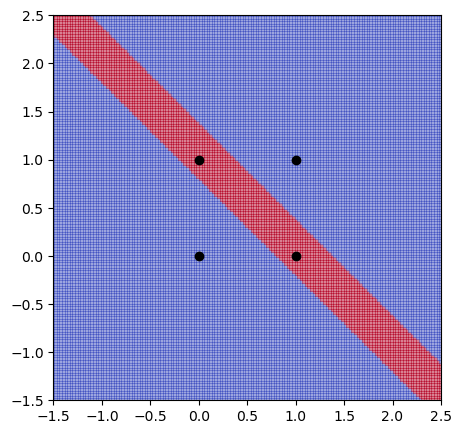

In [39]:
#XOR 다층 퍼셉트론 그림 그려보기
draw_heatmap(XOR)

# Iris Data를 이용한 퍼셉트론 실습

In [40]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

#아이리스 데이터 가져오기
iris = load_iris()

In [59]:
# 꽃잎 길이, 꽃잎 너비 데이터 특징만 사용한다.
X = iris.data[:, (2, 3)]  # petal length, petal width
X[48:53]

array([[1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9, 1.5]])

In [58]:
# Iris-Setosa: target == 0
# y: Iris-Setosa라면 1, 아니라면 (나머지 두 꽃이라면) 0
y = (iris.target == 0).astype(np.int32)
y[48:53]

array([1, 1, 0, 0, 0])

In [45]:
# 신경망 학습
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)
print(학습완료)

Perceptron(random_state=42)

In [60]:
#꽃잎 길이가 2, 꽃잎 너비가 0.5일 때 결과
y_pred = per_clf.predict([[2, 0.5]])
# 출력값: 1, 즉 이 꽃은 Iris-Setosa일 확률이 높다.
print(y_pred)

[1]


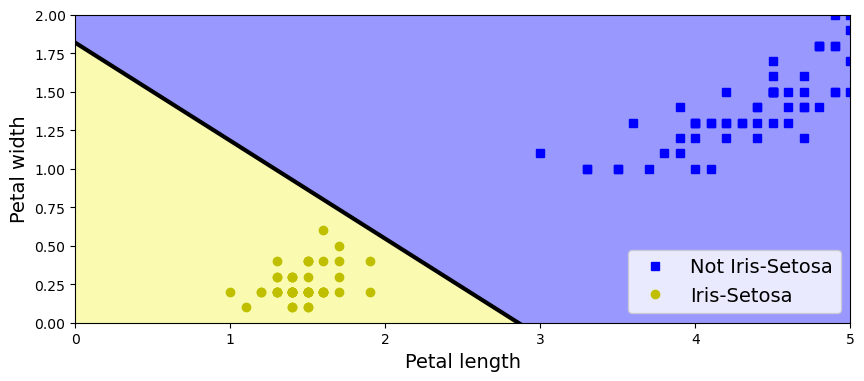

In [65]:
#Iris 퍼셉트론 분류기 시각화
def drawing_iris(show=True):
    a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
    b = -per_clf.intercept_ / per_clf.coef_[0][1]

    axes = [0, 5, 0, 2]

    x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = per_clf.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    plt.figure(figsize=(10, 4))

    #기존 데이터 점찍기
    plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
    plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

    #퍼셉트론 시각화
    plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

    #판단 영역 색칠하기
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="lower right", fontsize=14)
    plt.axis(axes)

    #save_fig("perceptron_iris_plot")
    if show:
      plt.show()
    

drawing_iris()

In [67]:
#직접 입력 넣어보기

def iris_interactive(petal_length, petal_width):
  #여러분이 입력한 꽃잎 길이와 너비가 들어온다.
  drawing_iris(False)
  
  #퍼셉트론은 여러분의 입력을 판단한다
  pred = per_clf.predict([[petal_length, petal_width]])
  
  plt.scatter([petal_length], [petal_width],
              s=150,
              c=("b", "y")[int(pred)],
              marker="X",
              edgecolor="r"
              )
  #save_fig("perceptron_iris_plot")
  plt.show()
  print("퍼셉트론의 판단: 이 것은 Iris-Setosa가",("아니다", "맞다")[pred[0]])
    

interactive_plot = interactive(iris_interactive, petal_length=widgets.FloatSlider(
           min=0.5, max=5.0, step=0.1, continuous_update=False),
                               petal_width=widgets.FloatSlider( value = 0.2,
           min=0.1, max=2.0, step=0.1, continuous_update=False))
interactive_plot


interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='petal_length', max=5.0, min…

# Gradient Descent

$y = x_0^2+x_1^2$ 을 최소값으로 만드는 $x_0$와 $x_1$ 을 Gradient Descent를 이용하여 찾아보자

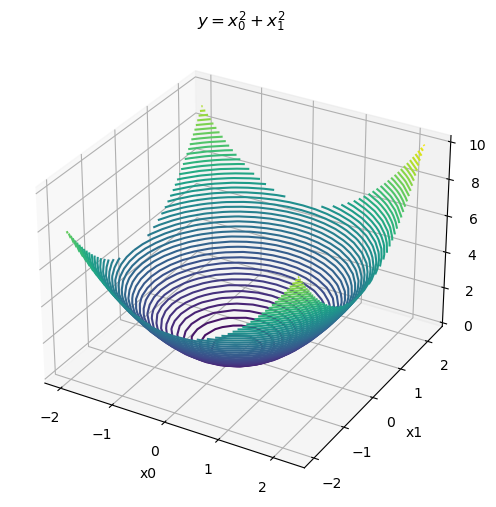

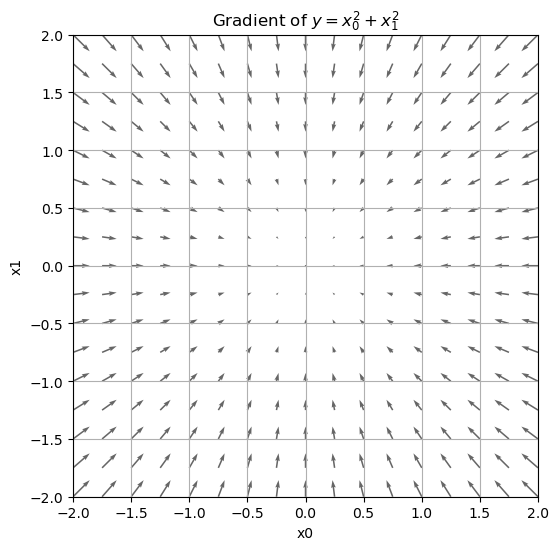

In [17]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    XX, YY = np.meshgrid(x0, x1)
    
    XX = XX.flatten()
    YY = YY.flatten()
    
    grad = numerical_gradient(function_2, np.array([XX, YY]))
    plt.figure(figsize=[6,6])
    ax = plt.subplot(projection="3d")
    ax.contour(x0, x1, function_2(np.array([XX,YY]).T).reshape([x0.shape[0], -1]), levels=50 )
    plt.title("$y = x_0^2+x_1^2$")
    plt.xlabel('x0')
    plt.ylabel('x1')
    
    
    plt.show()
    plt.figure(figsize=[6,6])
    plt.title("Gradient of $y = x_0^2+x_1^2$")
    plt.quiver(XX, YY, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    #plt.legend()
    plt.draw()
    plt.show()

In [21]:
import numpy as np
import matplotlib.pylab as plt
#from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

  
  
def GD_interactive(x0, x1):
  init_x = np.array([x0, x1])
  lr = 0.1
  step_num = 15
  # x_history: x의 이동 경로를 저장해둠
  x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

  plt.plot( [-5, 5], [0,0], '--b')
  plt.plot( [0,0], [-5, 5], '--b')
  # x의 이동 경로를 그림
  plt.scatter(x_history[:,0], x_history[:,1], marker='o', c=[((i+1)/step_num, 0, 1-(i+1)/step_num) for i in range(step_num)])

  plt.xlim(-3.5, 3.5)
  plt.ylim(-4.5, 4.5)
  plt.xlabel("X0")
  plt.ylabel("X1")
  plt.show()
      


interactive_plot = interactive(GD_interactive, x0=widgets.FloatSlider( value=-3,
           min=-3.5, max=3.5, step=0.1, continuous_update=False),
                               x1=widgets.FloatSlider( value = 4.0,
           min=-4.5, max=4.5, step=0.1, continuous_update=False))
#output = interactive_plot.children[-1]
#output.layout.height = '410px'
print("시작점 설정")
print("어떤 시작점을 잡아도 (0,0)으로 다가가는가?")
interactive_plot


시작점 설정
어떤 시작점을 잡아도 (0,0)으로 다가가는가?


interactive(children=(FloatSlider(value=-3.0, continuous_update=False, description='x0', max=3.5, min=-3.5), F…